In [96]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [97]:
sns.set_context('notebook')
sns.set_style('ticks')

# Read and clean data

In [132]:
gre = pd.read_csv('data/gre_requirements.csv', index_col=0)
acceptance = pd.read_csv('data/acceptance_rate.csv', index_col=0)
data = gre.merge(acceptance, on=['School name', 'Department'], how='left')

In [133]:
def clean_req_str(s):
    if 'no' in s:
        return 'Not required or recommended'
    elif 'required' in s:
        return 'Required'
    elif 'recommended' in s:
        return 'Recommended'
    else:
        return 'Unknown'

data['GRE Physics requirements'] = data['GRE Physics requirements'].apply(clean_req_str)
data['GRE requirements'] = data['GRE requirements'].apply(clean_req_str)

In [134]:
def clean_score_pcntile(s):
    if type(s) is float:
        return np.nan, np.nan
    try:
        score = s.split('(')[0]
    except AttributeError:
        score = s
    try:
        score = float(score)
    except ValueError:
        score = np.nan
    try:
        pcntile = int(s.split('(')[1].split('%')[0])
    except (AttributeError, IndexError):
        pcntile = np.nan
    return score, pcntile

to_clean_cols = [c for c in data.columns if 'score' in c]
for col_name in to_clean_cols:
    score_col_name = col_name.split('(')[0].strip()
    pcntile_col_name = score_col_name.replace('score', 'percentile')
    data[[score_col_name, pcntile_col_name]] = pd.DataFrame(data[col_name].apply(clean_score_pcntile).to_list())
data = data[[c for c in data.columns if c not in to_clean_cols]]

In [135]:
def rescale_scores(score):
    if score > 170:
        return score/800 * 170
    else:
        return score

for col_name in [c for c in data.columns if 'score' in c and 'Physics' not in c]:
    data[col_name] = data[col_name].apply(rescale_scores)

In [136]:
data['Acceptance rate'] = data['Acceptance rate'].str.rstrip('%').astype(float)

In [137]:
data.describe()

,Acceptance rate,Number applied,Number admitted,Number enrolled,Minimum Quantitative score,Minimum Quantitative percentile,Minimum Verbal score,Minimum Verbal percentile,Minimum Analytical writing score,Minimum Analytical writing percentile,Minimum GRE Physics score,Minimum GRE Physics percentile
count,170.000000,170.000000,170.000000,168.000000,39.000000,35.000000,31.000000,28.000000,29.000000,21.000000,17.000000,26.000000
mean,33.170118,169.464706,39.611765,15.440476,152.016026,50.828571,146.137097,44.428571,3.365517,23.714286,650.294118,34.923077
std,18.710305,203.720778,37.641125,13.458164,13.025348,22.561662,18.386118,20.983995,0.506582,15.136522,72.107355,17.565701
min,5.770000,8.000000,2.000000,1.000000,80.000000,8.000000,60.000000,6.000000,2.500000,14.000000,500.000000,1.000000
25%,18.695000,44.250000,14.000000,7.000000,150.000000,27.000000,146.500000,28.000000,3.000000,14.000000,600.000000,23.000000
50%,28.805000,90.500000,25.000000,12.000000,155.000000,61.000000,150.000000,44.000000,3.000000,14.000000,650.000000,31.000000
75%,44.492500,187.250000,53.750000,19.250000,158.687500,65.000000,153.000000,59.000000,3.500000,35.000000,700.000000,48.500000
max,100.000000,1009.000000,232.000000,95.000000,165.000000,87.000000,160.000000,84.000000,4.600000,54.000000,780.000000,69.000000


# Plotting

Text(0.5, 0, 'Minimum score')

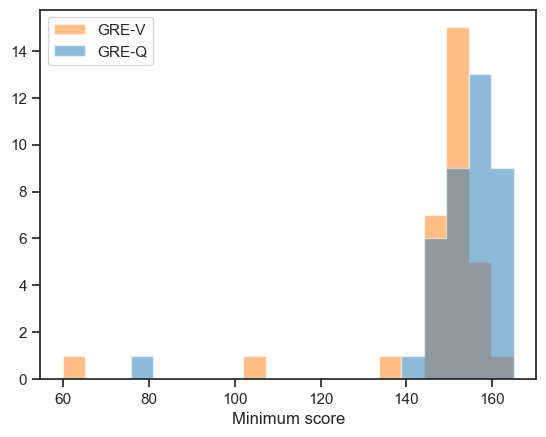

In [138]:
plt.hist([data['Minimum Quantitative score'], data['Minimum Verbal score']],
         label=['GRE-Q', 'GRE-V'],
         bins=20, histtype='stepfilled', alpha=0.5)
plt.legend(loc='upper left')
plt.xlabel('Minimum score')

/Users/samdixon/.local/lib/python3.6/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/samdixon/.local/lib/python3.6/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Text(0.5, 0, 'Minimum PGRE Score Accepted')

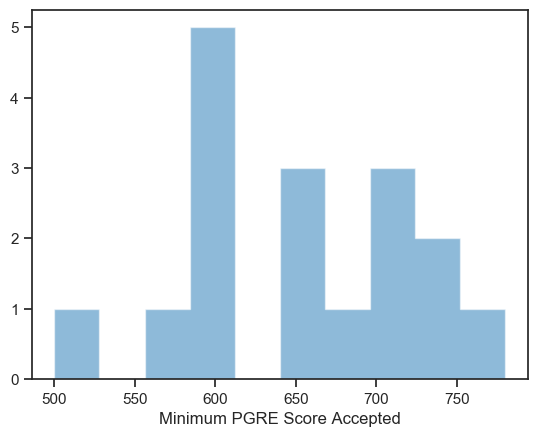

In [144]:
plt.hist(data['Minimum GRE Physics score'],
         bins=10, histtype='stepfilled', alpha=0.5)
plt.xlabel('Minimum PGRE Score Accepted')

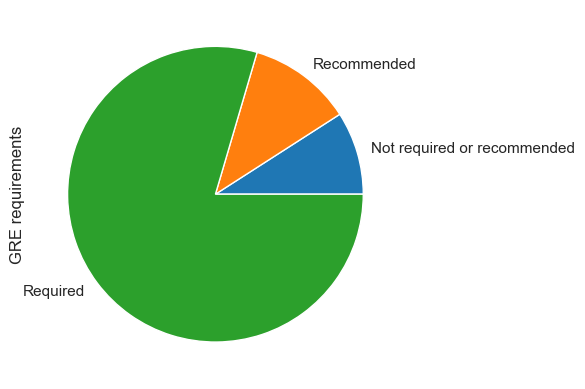

In [145]:
data.groupby('GRE requirements')['GRE requirements'].count().plot.pie()

Text(0, 0.5, '')

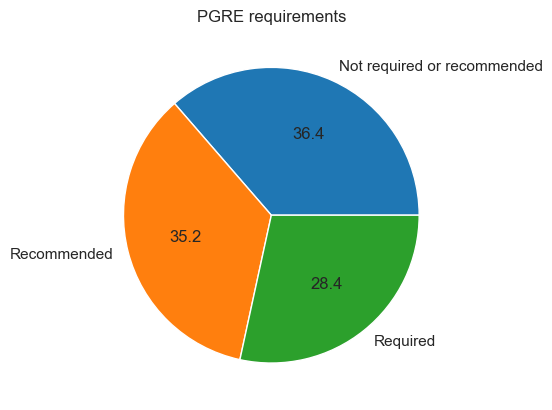

In [146]:
cts = data.groupby('GRE Physics requirements')['GRE Physics requirements'].count()
cts.plot.pie(autopct='%.1f')
plt.title('PGRE requirements')
plt.ylabel('')

GRE Physics requirements
Not required or recommended    [[AxesSubplot(0.125,0.11;0.775x0.77)]]
Recommended                    [[AxesSubplot(0.125,0.11;0.775x0.77)]]
Required                       [[AxesSubplot(0.125,0.11;0.775x0.77)]]
dtype: object

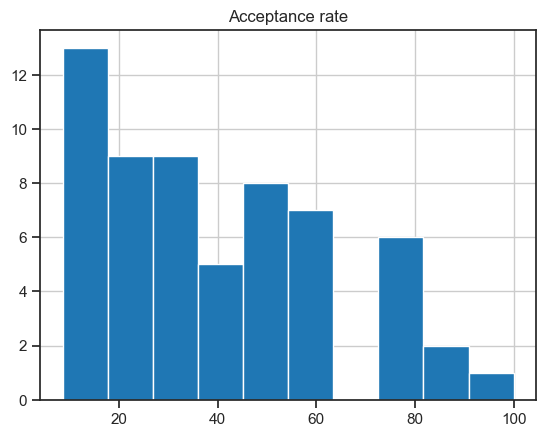

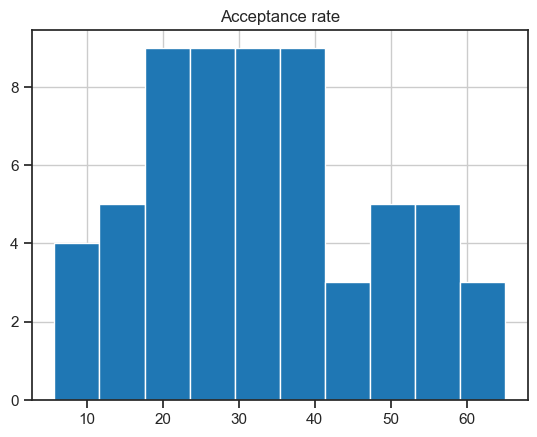

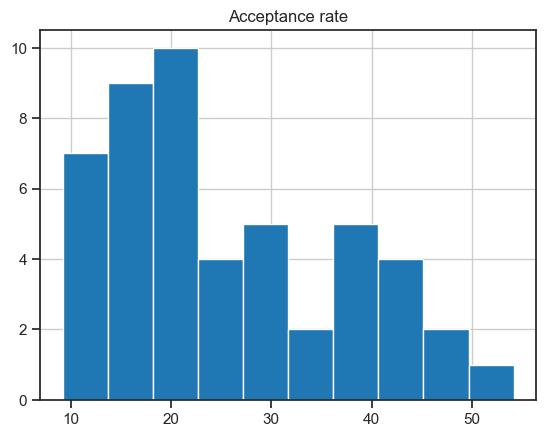

In [120]:
data.groupby('GRE Physics requirements').hist('Acceptance rate')

/Users/samdixon/.local/lib/python3.6/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/samdixon/.local/lib/python3.6/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Text(0.5, 0, 'Yield (Number enrolled/number admitted)')

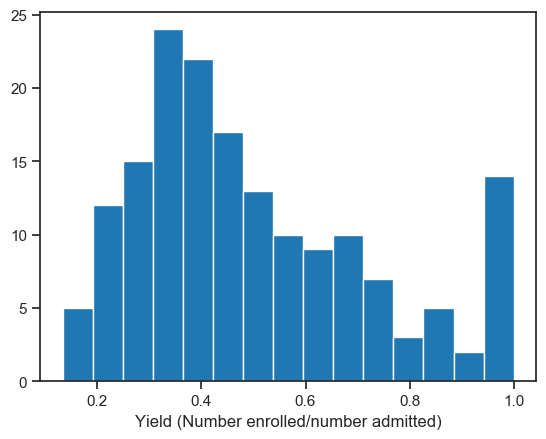

In [149]:
plt.hist(data['Number enrolled']/data['Number admitted'], bins=15)
plt.xlabel('Yield (Number enrolled/number admitted)')

Text(0, 0.5, 'Yield rate (%)')

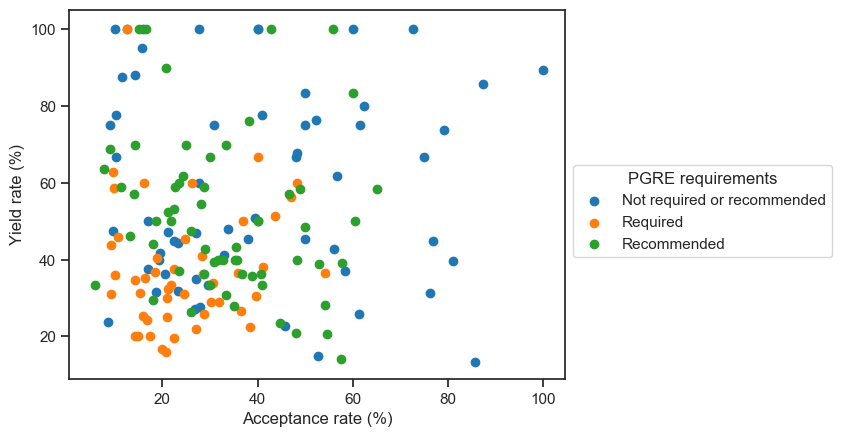

In [165]:
for i, req in enumerate(data['GRE Physics requirements'].unique()):
    subset = data[data['GRE Physics requirements']==req]
    plt.scatter(subset['Acceptance rate'],
                100*subset['Number enrolled']/subset['Number admitted'],
                c='C{}'.format(i), label=req)
plt.legend(bbox_to_anchor=(1, 0.6), loc='upper left',
           title='PGRE requirements')
plt.xlabel('Acceptance rate (%)')
plt.ylabel('Yield rate (%)')

Text(0, 0.5, 'Number of applications')

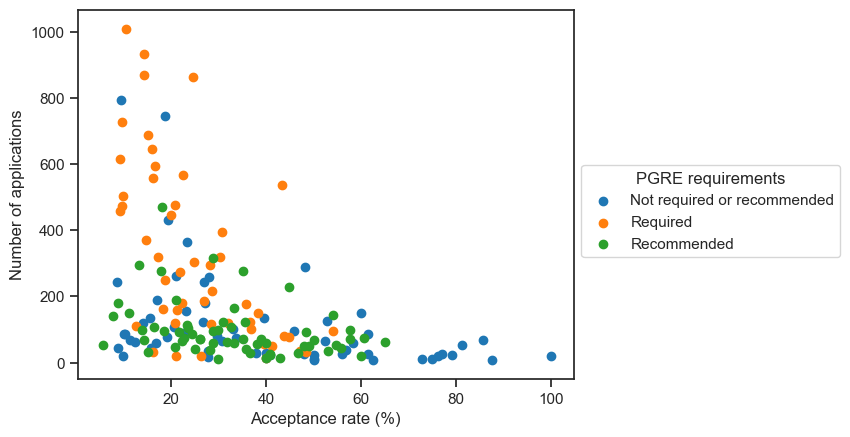

In [175]:
for i, req in enumerate(data['GRE Physics requirements'].unique()):
    subset = data[data['GRE Physics requirements']==req]
    plt.scatter(subset['Acceptance rate'],
                subset['Number applied'],
                c='C{}'.format(i), label=req)
plt.legend(bbox_to_anchor=(1, 0.6), loc='upper left',
           title='PGRE requirements')
plt.xlabel('Acceptance rate (%)')
plt.ylabel('Number of applications')

Text(0, 0.5, 'Number of applications')

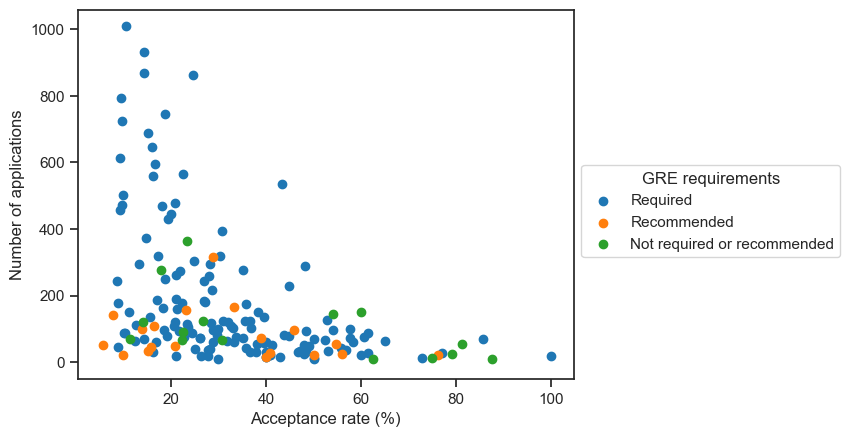

In [177]:
for i, req in enumerate(data['GRE requirements'].unique()):
    subset = data[data['GRE requirements']==req]
    plt.scatter(subset['Acceptance rate'],
                subset['Number applied'],
                c='C{}'.format(i), label=req)
plt.legend(bbox_to_anchor=(1, 0.6), loc='upper left',
           title='GRE requirements')
plt.xlabel('Acceptance rate (%)')
plt.ylabel('Number of applications')

In [176]:
data[(data['Number applied']>700)]

,School name,Department,GRE requirements,GRE Physics requirements,Acceptance rate,Number applied,Number admitted,Number enrolled,Minimum Quantitative score,Minimum Quantitative percentile,Minimum Verbal score,Minimum Verbal percentile,Minimum Analytical writing score,Minimum Analytical writing percentile,Minimum GRE Physics score,Minimum GRE Physics percentile
10,"University of California, Santa Barbara",Physics,Required,Required,14.27,869.0,124.0,25.0,NaN,65.0,NaN,28.0,NaN,14.0,NaN,45.0
46,"University of California, Berkeley",Physics,Required,Required,14.27,932.0,133.0,46.0,NaN,NaN,NaN,NaN,NaN,NaN,730.0,60.0
59,"University of Colorado, Boulder",Physics,Required,Required,24.57,863.0,212.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
114,Harvard University,Physics,Required,Required,9.64,726.0,70.0,44.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
120,Massachusetts Institute of Technology,Physics,Required,Required,10.60,1009.0,107.0,49.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
127,Stanford University,Physics,Required,Not required or recommended,9.57,794.0,76.0,36.0,NaN,NaN,NaN,NaN,4.6,NaN,NaN,NaN
130,"University of Illinois, Urbana-Champaign",Physics,Required,Not required or recommended,18.66,745.0,139.0,44.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.0
